In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import matplotlib.ticker as ticker

# Data Visualization

In [0]:
data=pd.read_csv('/content/drive/My Drive/TimeSeriesProject/ShanghaiPM20100101_20151231.csv')

In [0]:
data=data[['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws','precipitation']]
data.columns

Index(['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation'], dtype='object')

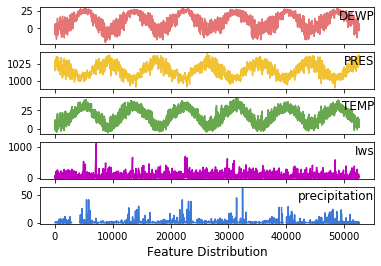

In [0]:
data=data[['DEWP', 'PRES', 'TEMP', 'Iws','precipitation']]
values = data.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
plt.figure()
c=['#e57474','#f1c232','#6aa84f','m','#3c78d8','#674ea7']
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group],c=c[group])
	plt.title(data.columns[group], y=0.5, loc='right')
	i += 1
plt.title('Feature Distribution',position=(0.5,-1))
plt.show()

In [0]:
print('missing humidity',len(data[data['HUMI'].isnull()]))

missing humidity 13


In [0]:
data=data[data['HUMI'].notnull()]

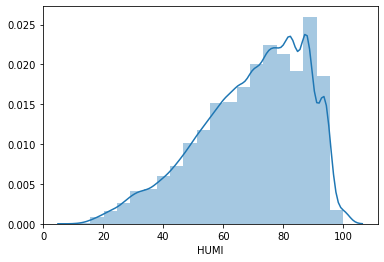

In [0]:
sns.distplot(data['HUMI'],bins=20)

In [0]:
data['HUMI'].describe()

count    52571.000000
mean        69.545646
std         17.658942
min         11.320000
25%         57.930000
50%         72.420000
75%         83.370000
max        100.000000
Name: HUMI, dtype: float64

In [0]:
for i in ['DEWP', 'PRES', 'TEMP', 'cbwd', 'Iws','precipitation']:
    if len(data[data[i].isnull()])>0:
      print(i, len(data[data[i].isnull()]))

In [0]:
data[data['PRES'].isnull()]

,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,SE,NE,SW,NW


In [0]:
data['precipitation']=data['precipitation'].fillna(0)

In [0]:
data['precipitation']=data['precipitation'].fillna(0)
mean=data['PRES'].mean()
data['PRES']= data['PRES'].fillna(mean)
data['SE']=np.array(data['cbwd']=='SE').astype(int)
data['NE']=np.array(data['cbwd']=='NE').astype(int)
data['SW']=np.array(data['cbwd']=='SW').astype(int)
data['NW']=np.array(data['cbwd']=='NW').astype(int)

In [0]:
list(data.columns)

['DEWP',
 'HUMI',
 'PRES',
 'TEMP',
 'cbwd',
 'Iws',
 'precipitation',
 'SE',
 'NE',
 'SW',
 'NW']

In [0]:
data=data.drop(['cbwd'],1)

In [0]:
data.corr(method='spearman')
data.corr()

,DEWP,HUMI,PRES,TEMP,Iws,precipitation,SE,NE,SW,NW
DEWP,1.000000,0.431864,-0.854348,0.890418,0.008583,0.080728,0.215926,-0.091823,0.109170,-0.209996
HUMI,0.431864,1.000000,-0.231780,-0.017044,0.043268,0.138903,0.020866,0.066294,-0.103263,-0.048051
PRES,-0.854348,-0.231780,1.000000,-0.840604,0.015453,-0.084059,-0.222647,0.192602,-0.180288,0.146663
TEMP,0.890418,-0.017044,-0.840604,1.000000,-0.016088,0.028509,0.222765,-0.138341,0.176094,-0.201647
Iws,0.008583,0.043268,0.015453,-0.016088,1.000000,0.034890,0.019124,0.154774,-0.142292,-0.026435
precipitation,0.080728,0.138903,-0.084059,0.028509,0.034890,1.000000,-0.019315,0.042386,-0.020716,-0.007749
SE,0.215926,0.020866,-0.222647,0.222765,0.019124,-0.019315,1.000000,-0.486764,-0.229875,-0.299078
NE,-0.091823,0.066294,0.192602,-0.138341,0.154774,0.042386,-0.486764,1.000000,-0.278368,-0.362169
SW,0.109170,-0.103263,-0.180288,0.176094,-0.142292,-0.020716,-0.229875,-0.278368,1.000000,-0.171035
NW,-0.209996,-0.048051,0.146663,-0.201647,-0.026435,-0.007749,-0.299078,-0.362169,-0.171035,1.000000


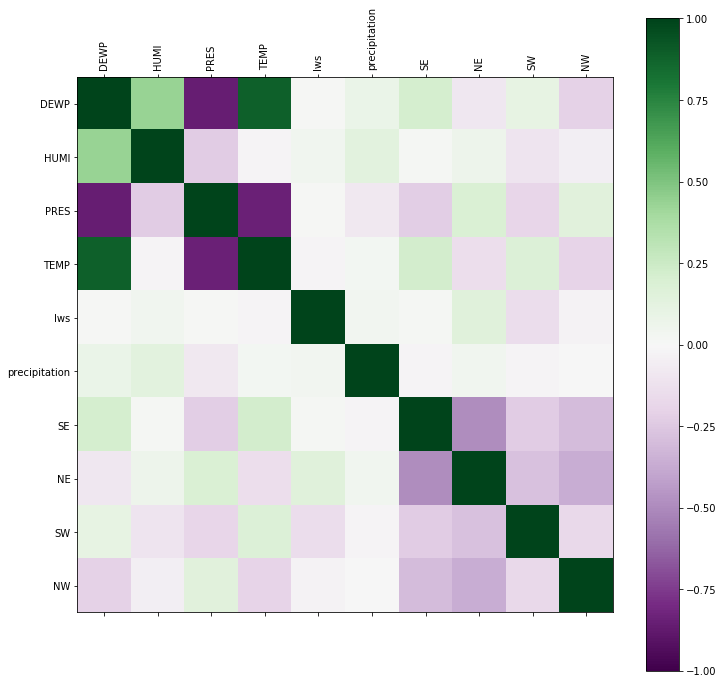

In [0]:
# Correlations among columns
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(),interpolation='nearest',vmax=1,vmin=-1,cmap='PRGn')
# ax.title('corr', size=15)
ax.set_xticklabels(['']+list(data.columns), rotation=90)
ax.set_yticklabels(['']+list(data.columns))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
fig.colorbar(cax)
plt.show()

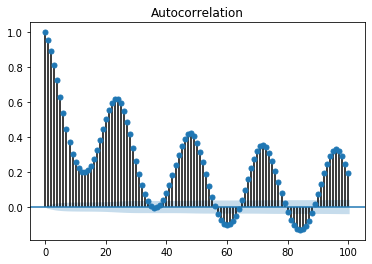

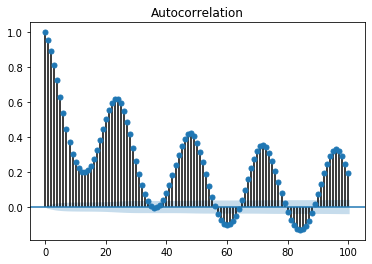

In [0]:
plot_acf(data['HUMI'], lags=100)

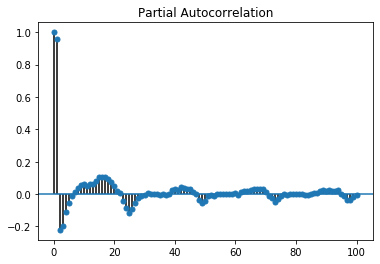

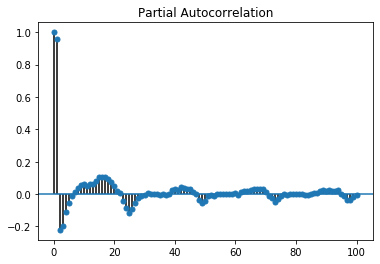

In [0]:
plot_pacf(data['HUMI'], lags=100)

In [0]:
data.columns

Index(['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'SE', 'NE',
       'SW', 'NW'],
      dtype='object')

Text(0.5, 1.0, 'Target Distiribution')

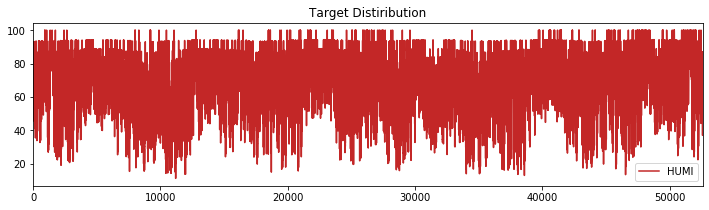

In [0]:
fig = plt.figure(figsize=(12,3))
# data['HUMI'].plot(color='#9c1414', legend=True)
data['HUMI'].plot(color='#c32727', legend=True)
plt.title('Target Distiribution')

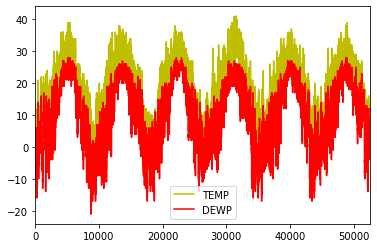

In [0]:
data['TEMP'].plot(color='y', legend=True)
data['DEWP'].plot(color='r', legend=True)

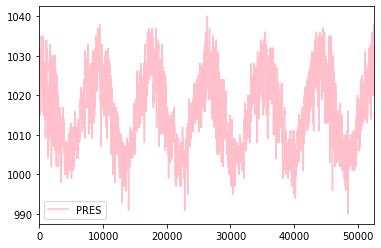

In [0]:
data['PRES'].plot(color='pink', legend=True)

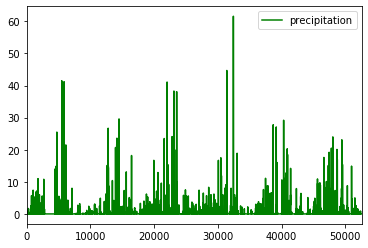

In [0]:
data['precipitation'].plot(color='g', legend=True)

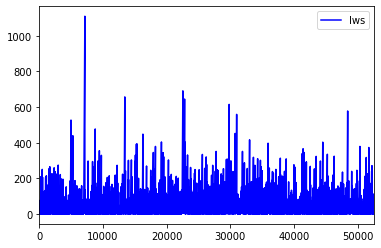

In [0]:
data['Iws'].plot(color='b', legend=True)

# Linear Regression

In [0]:
df=pd.read_csv('/content/drive/My Drive/TimeSeriesProject/ShanghaiPM20100101_20151231.csv')

In [0]:
df

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
52580,52581,2015,12,31,20,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
52581,52582,2015,12,31,21,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0
52582,52583,2015,12,31,22,4,83.0,86.0,92.0,0.0,70.06,1035.0,5.0,NE,25.0,0.0,0.0


In [0]:
df=df[df['HUMI'].notnull()]

In [0]:
train_df=df[(df['year']<=2013)|((df['year']==2014)&(df['month']<=6))]
val_df=df[((df['year']==2014)&(df['month']>=7))|((df['year']==2015)&(df['month']<=6))]
test_df=df[(df['year']==2015)&(df['month']<=12)&(df['month']>=7)]

In [0]:
X_train = train_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation']]
y_train = train_df['HUMI']

In [0]:
X_val = val_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation']]
y_val = val_df['HUMI']
X_test = test_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation']]
y_test = test_df['HUMI']

In [0]:
X_train['precipitation']=X_train['precipitation'].fillna(0)
mean=X_train['PRES'].mean()
X_train['PRES']= X_train['PRES'].fillna(mean)
X_train['SE']=np.array(X_train['cbwd']=='SE').astype(int)
X_train['NE']=np.array(X_train['cbwd']=='NE').astype(int)
X_train['SW']=np.array(X_train['cbwd']=='SW').astype(int)
X_train['NW']=np.array(X_train['cbwd']=='NW').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
X_val['precipitation']=X_val['precipitation'].fillna(0)
mean=X_val['PRES'].mean()
X_val['PRES']= X_val['PRES'].fillna(mean)
X_val['SE']=np.array(X_val['cbwd']=='SE').astype(int)
X_val['NE']=np.array(X_val['cbwd']=='NE').astype(int)
X_val['SW']=np.array(X_val['cbwd']=='SW').astype(int)
X_val['NW']=np.array(X_val['cbwd']=='NW').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
X_test['precipitation']=X_test['precipitation'].fillna(0)
mean=X_test['PRES'].mean()
X_test['PRES']= X_test['PRES'].fillna(mean)
X_test['SE']=np.array(X_test['cbwd']=='SE').astype(int)
X_test['NE']=np.array(X_test['cbwd']=='NE').astype(int)
X_test['SW']=np.array(X_test['cbwd']=='SW').astype(int)
X_test['NW']=np.array(X_test['cbwd']=='NW').astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
X_train=X_train.drop(['cbwd'],1)
X_val=X_val.drop(['cbwd'],1)
X_test=X_test.drop(['cbwd'],1)

In [0]:
X_train=X_train.drop(['PRES','TEMP'],1)
X_val=X_val.drop(['PRES','TEMP'],1)
X_test=X_test.drop(['PRES','TEMP'],1)

In [0]:
y_train=train_data_normalized[:,0]
X_train=train_data_normalized[:,1:]
y_val=val_data_normalized[:,0]
X_val=val_data_normalized[:,1:]

In [0]:
from sklearn.linear_model import Ridge
trainscore=[]
valscore=[]
for i in [0.01,0.001,0.0001,0.00001,0.000001,0.0000001,10**-8,10**-10,10**-12]:
  model=Ridge(alpha=i,normalize=True)
  model.fit(X_train,y_train)
  trainscore.append((model.score(X_train,y_train)))
  valscore.append((model.score(X_val,y_val)))

In [0]:
model=Ridge()
model.fit(X_train,y_train)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,model.predict(X_val))

0.029592514709175507

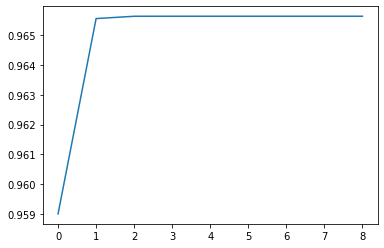

In [0]:
#plt.plot(range(len(valscore)),valscore)
plt.plot(range(len(valscore)),trainscore)

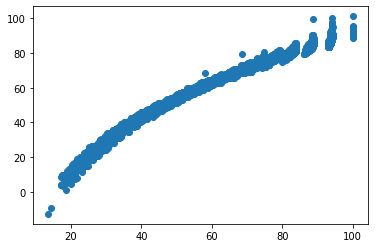

In [0]:
plt.scatter(y_val,model.predict(X_val))

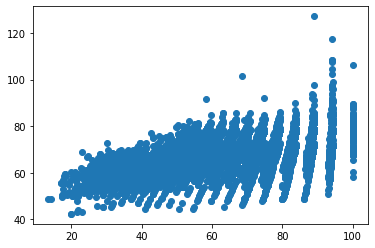

In [0]:
plt.scatter(y_val,model.predict(X_val))

In [0]:
model.coef_

array([ 7.95469555e-01,  4.56087184e-03,  1.55018796e+00, -8.19796140e+00,
       -3.48685240e+00, -1.44259471e+01, -4.26267956e+00])

In [0]:
model.coef_

array([ 3.72146073e+00, -1.64716118e-01, -3.66364083e+00, -9.89119823e-04,
        2.89604210e-01, -1.10662458e+00, -5.36018296e-01, -9.37992965e-01,
       -1.84916557e-01])

In [0]:
X_train.columns

Index(['DEWP', 'PRES', 'TEMP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW'], dtype='object')

In [0]:
X=X_train.drop(['PRES'],1)

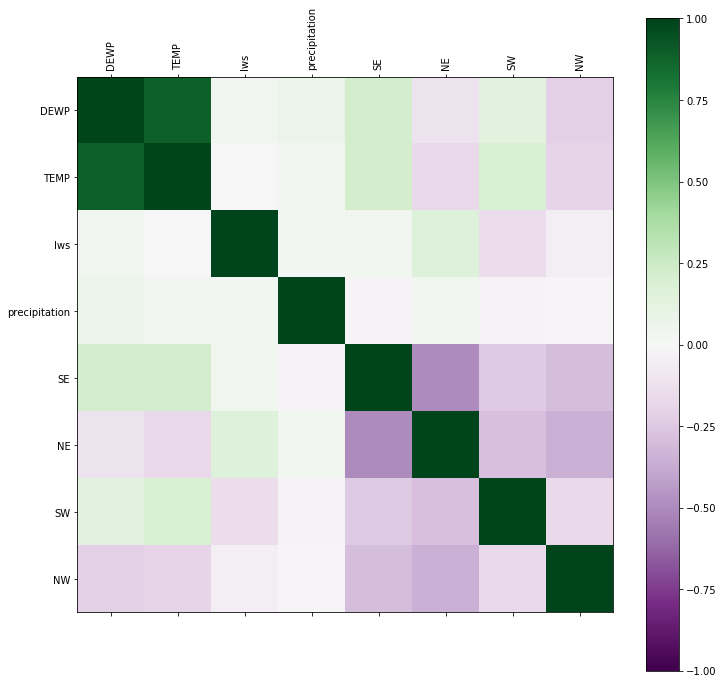

In [0]:
# Correlations among columns
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(X.corr(),interpolation='nearest',vmax=1,vmin=-1,cmap='PRGn')
# ax.title('corr', size=15)
ax.set_xticklabels(['']+list(X.columns), rotation=90)
ax.set_yticklabels(['']+list(X.columns))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
fig.colorbar(cax)
plt.show()

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [0]:
vif

,VIF Factor,features
0,10.849437,DEWP
1,25.222329,PRES
2,21.531697,TEMP
3,1.471534,Iws
4,1.032230,precipitation
5,7.781939,SE
6,9.533472,NE
7,3.766982,SW
8,4.877122,NW


# ARIMA

In [0]:
df=pd.read_csv('/content/drive/My Drive/TimeSeriesProject/ShanghaiPM20100101_20151231.csv')
#df=df[df['HUMI'].notnull()]
train_df=df[(df['year']<=2013)|((df['year']==2014)&(df['month']<=6))]
val_df=df[((df['year']==2014)&(df['month']>=7))|((df['year']==2015)&(df['month']<=6))]
test_df=df[(df['year']==2015)&(df['month']<=12)&(df['month']>=7)]

In [0]:
train_df=train_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
train_df['precipitation']=train_df['precipitation'].fillna(0)
mean=train_df['PRES'].mean()
train_df['PRES']= train_df['PRES'].fillna(mean)
train_df['SE']=np.array(train_df['cbwd']=='SE').astype(int)
train_df['NE']=np.array(train_df['cbwd']=='NE').astype(int)
train_df['SW']=np.array(train_df['cbwd']=='SW').astype(int)
train_df['NW']=np.array(train_df['cbwd']=='NW').astype(int)
train_df=train_df.drop(['cbwd'],1)
train_df=train_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(train_df['DEWP'])):
  value=train_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['DEWP'][end])==True:
      end+=1
    if np.isnan(train_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+train_df['DEWP'][end])/2
    else:
      fill=(train_df['DEWP'][i-1]+train_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(train_df['Iws'])):
  value=train_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['Iws'][end])==True:
      end+=1
    if np.isnan(train_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+train_df['Iws'][end])/2
    else:
      fill=(train_df['Iws'][i-1]+train_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(train_df['HUMI'])):
  value=train_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['HUMI'][end])==True:
      end+=1
    if np.isnan(train_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+train_df['HUMI'][end])/2
    else:
      fill=(train_df['HUMI'][i-1]+train_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

train_df['DEWP']=np.array(dewplist)
train_df['Iws']=np.array(iwslist)
train_df['HUMI']=np.array(humilist)

val_df=val_df.reset_index(drop=True)
val_df=val_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
val_df['precipitation']=val_df['precipitation'].fillna(0)
mean=val_df['PRES'].mean()
val_df['PRES']= val_df['PRES'].fillna(mean)
val_df['SE']=np.array(val_df['cbwd']=='SE').astype(int)
val_df['NE']=np.array(val_df['cbwd']=='NE').astype(int)
val_df['SW']=np.array(val_df['cbwd']=='SW').astype(int)
val_df['NW']=np.array(val_df['cbwd']=='NW').astype(int)
val_df=val_df.drop(['cbwd'],1)
val_df=val_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(val_df['DEWP'])):
  value=val_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['DEWP'][end])==True:
      end+=1
    if np.isnan(val_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+val_df['DEWP'][end])/2
    else:
      fill=(val_df['DEWP'][i-1]+val_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(val_df['Iws'])):
  value=val_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['Iws'][end])==True:
      end+=1
    if np.isnan(val_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+val_df['Iws'][end])/2
    else:
      fill=(val_df['Iws'][i-1]+val_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(val_df['HUMI'])):
  value=val_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['HUMI'][end])==True:
      end+=1
    if np.isnan(val_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+val_df['HUMI'][end])/2
    else:
      fill=(val_df['HUMI'][i-1]+val_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

val_df['DEWP']=np.array(dewplist)
val_df['Iws']=np.array(iwslist)
val_df['HUMI']=np.array(humilist)

test_df=test_df.reset_index(drop=True)

test_df=test_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
test_df['precipitation']=test_df['precipitation'].fillna(0)
mean=test_df['PRES'].mean()
test_df['PRES']= test_df['PRES'].fillna(mean)
test_df['SE']=np.array(test_df['cbwd']=='SE').astype(int)
test_df['NE']=np.array(test_df['cbwd']=='NE').astype(int)
test_df['SW']=np.array(test_df['cbwd']=='SW').astype(int)
test_df['NW']=np.array(test_df['cbwd']=='NW').astype(int)
test_df=test_df.drop(['cbwd'],1)
test_df=test_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(test_df['DEWP'])):
  value=test_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['DEWP'][end])==True:
      end+=1
    if np.isnan(test_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+test_df['DEWP'][end])/2
    else:
      fill=(test_df['DEWP'][i-1]+test_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(test_df['Iws'])):
  value=test_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['Iws'][end])==True:
      end+=1
    if np.isnan(test_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+test_df['Iws'][end])/2
    else:
      fill=(test_df['Iws'][i-1]+test_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(test_df['HUMI'])):
  value=test_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['HUMI'][end])==True:
      end+=1
    if np.isnan(test_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+test_df['HUMI'][end])/2
    else:
      fill=(test_df['HUMI'][i-1]+test_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

test_df['DEWP']=np.array(dewplist)
test_df['Iws']=np.array(iwslist)
test_df['HUMI']=np.array(humilist)

train_df=train_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
val_df=val_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
test_df=test_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_df)
val_data_normalized = scaler.transform(val_df)
test_data_normalized = scaler.transform(test_df)

In [0]:
train_y=train_data_normalized[:,0]
val_y=val_data_normalized[:,0]
test_y=test_data_normalized[:,0]

In [0]:
gaussian_train_x=[]
gaussian_train_y=[]
gaussian_val_x=[]
gaussian_val_y=[]
gaussian_test_x=[]
gaussian_test_y=[]
for i in range(len(train_y)):
  if i%10==0:
    gaussian_train_y.append(train_y[i])
    gaussian_train_x.append(train_x[i])

for i in range(len(val_y)):
  if i%10==0:
    gaussian_val_y.append(val_y[i])
    gaussian_val_x.append(val_x[i])

for i in range(len(test_y)):
  if i%10==0:
    gaussian_test_y.append(test_y[i])
    gaussian_test_x.append(test_x[i])

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
# alpha_list = [0.1]
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel,ExpSineSquared
# kernel_list = [ExpSineSquared]
best_acc = 0
best_alpha = 0
best_kernel = None
kernel = ExpSineSquared()
# for alpha in alpha_list:
#   for kernel in kernel_list:
gpr = GaussianProcessRegressor()
time = np.arange(1,len(gaussian_train_y)+1).reshape(-1,1)
gpr.fit(gaussian_train_x,gaussian_train_y)
acc = gpr.score(gaussian_val_x,gaussian_val_y)
# acc = gpr.score(new_X_val,y_val)
# if acc>best_acc:
#   best_acc = acc
#   best_kernel = kernel
#   best_alpha = alpha
#   print(acc)

# gpr = GaussianProcessRegressor(kernel = best_kernel,alpha = best_alpha)
# gpr.fit(new_X_train,y_train)
# mus, sigmas = gpr.predict(new_X_test, return_std=True)
print('Accuracy: ', acc)

Accuracy:  -2.4000883335786463


# LSTM LAG=1

In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [0]:
df=pd.read_csv('/content/drive/My Drive/TimeSeriesProject/ShanghaiPM20100101_20151231.csv')
#df=df[df['HUMI'].notnull()]
train_df=df[(df['year']<=2013)|((df['year']==2014)&(df['month']<=6))]
val_df=df[((df['year']==2014)&(df['month']>=7))|((df['year']==2015)&(df['month']<=6))]
test_df=df[(df['year']==2015)&(df['month']<=12)&(df['month']>=7)]

In [0]:
train_df=train_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
train_df['precipitation']=train_df['precipitation'].fillna(0)
mean=train_df['PRES'].mean()
train_df['PRES']= train_df['PRES'].fillna(mean)
train_df['SE']=np.array(train_df['cbwd']=='SE').astype(int)
train_df['NE']=np.array(train_df['cbwd']=='NE').astype(int)
train_df['SW']=np.array(train_df['cbwd']=='SW').astype(int)
train_df['NW']=np.array(train_df['cbwd']=='NW').astype(int)
train_df=train_df.drop(['cbwd'],1)
train_df=train_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(train_df['DEWP'])):
  value=train_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['DEWP'][end])==True:
      end+=1
    if np.isnan(train_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+train_df['DEWP'][end])/2
    else:
      fill=(train_df['DEWP'][i-1]+train_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(train_df['Iws'])):
  value=train_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['Iws'][end])==True:
      end+=1
    if np.isnan(train_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+train_df['Iws'][end])/2
    else:
      fill=(train_df['Iws'][i-1]+train_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(train_df['HUMI'])):
  value=train_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(train_df['HUMI'][end])==True:
      end+=1
    if np.isnan(train_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+train_df['HUMI'][end])/2
    else:
      fill=(train_df['HUMI'][i-1]+train_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

train_df['DEWP']=np.array(dewplist)
train_df['Iws']=np.array(iwslist)
train_df['HUMI']=np.array(humilist)

In [0]:
val_df=val_df.reset_index(drop=True)

In [0]:
val_df=val_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
val_df['precipitation']=val_df['precipitation'].fillna(0)
mean=val_df['PRES'].mean()
val_df['PRES']= val_df['PRES'].fillna(mean)
val_df['SE']=np.array(val_df['cbwd']=='SE').astype(int)
val_df['NE']=np.array(val_df['cbwd']=='NE').astype(int)
val_df['SW']=np.array(val_df['cbwd']=='SW').astype(int)
val_df['NW']=np.array(val_df['cbwd']=='NW').astype(int)
val_df=val_df.drop(['cbwd'],1)
val_df=val_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(val_df['DEWP'])):
  value=val_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['DEWP'][end])==True:
      end+=1
    if np.isnan(val_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+val_df['DEWP'][end])/2
    else:
      fill=(val_df['DEWP'][i-1]+val_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(val_df['Iws'])):
  value=val_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['Iws'][end])==True:
      end+=1
    if np.isnan(val_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+val_df['Iws'][end])/2
    else:
      fill=(val_df['Iws'][i-1]+val_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(val_df['HUMI'])):
  value=val_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(val_df['HUMI'][end])==True:
      end+=1
    if np.isnan(val_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+val_df['HUMI'][end])/2
    else:
      fill=(val_df['HUMI'][i-1]+val_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

val_df['DEWP']=np.array(dewplist)
val_df['Iws']=np.array(iwslist)
val_df['HUMI']=np.array(humilist)

In [0]:
test_df=test_df.reset_index(drop=True)

In [0]:
test_df=test_df[['DEWP','PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation','HUMI']]
test_df['precipitation']=test_df['precipitation'].fillna(0)
mean=test_df['PRES'].mean()
test_df['PRES']= test_df['PRES'].fillna(mean)
test_df['SE']=np.array(test_df['cbwd']=='SE').astype(int)
test_df['NE']=np.array(test_df['cbwd']=='NE').astype(int)
test_df['SW']=np.array(test_df['cbwd']=='SW').astype(int)
test_df['NW']=np.array(test_df['cbwd']=='NW').astype(int)
test_df=test_df.drop(['cbwd'],1)
test_df=test_df.drop(['PRES','TEMP'],1)
dewplist=[]
for i in range(len(test_df['DEWP'])):
  value=test_df['DEWP'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['DEWP'][end])==True:
      end+=1
    if np.isnan(test_df['DEWP'][i-1])==True:
      fill=(dewplist[i-1]+test_df['DEWP'][end])/2
    else:
      fill=(test_df['DEWP'][i-1]+test_df['DEWP'][end])/2
    dewplist.append(fill)
  else:
    dewplist.append(value)

iwslist=[]
for i in range(len(test_df['Iws'])):
  value=test_df['Iws'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['Iws'][end])==True:
      end+=1
    if np.isnan(test_df['Iws'][i-1])==True:
      fill=(iwslist[i-1]+test_df['Iws'][end])/2
    else:
      fill=(test_df['Iws'][i-1]+test_df['Iws'][end])/2
    iwslist.append(fill)
  else:
    iwslist.append(value)

humilist=[]
for i in range(len(test_df['HUMI'])):
  value=test_df['HUMI'][i]
  if np.isnan(value)==True:
    end=i
    while np.isnan(test_df['HUMI'][end])==True:
      end+=1
    if np.isnan(test_df['HUMI'][i-1])==True:
      fill=(humilist[i-1]+test_df['HUMI'][end])/2
    else:
      fill=(test_df['HUMI'][i-1]+test_df['HUMI'][end])/2
    humilist.append(fill)
  else:
    humilist.append(value)

test_df['DEWP']=np.array(dewplist)
test_df['Iws']=np.array(iwslist)
test_df['HUMI']=np.array(humilist)

In [0]:
# def collate_fn(batch):
#     # batch is a list of sample tuples
#     input_list = [s[:-1] for s in batch]
#     target_list = [s[-1] for s in batch]
#     return input_list, target_list

In [0]:
train_df[train_df.isna().any(axis=1)]

,DEWP,Iws,precipitation,HUMI,SE,NE,SW,NW


In [0]:
train_df=train_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
val_df=val_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]
test_df=test_df[['HUMI','DEWP', 'Iws', 'precipitation', 'SE', 'NE', 'SW', 'NW']]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_df)
val_data_normalized = scaler.transform(val_df)
test_data_normalized = scaler.transform(test_df)

In [0]:
# reference: machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
	# input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg
 
train = series_to_supervised(train_data_normalized, 1, 1)
val = series_to_supervised(val_data_normalized, 1, 1)
test = series_to_supervised(test_data_normalized, 1, 1)

# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())

In [0]:
train.drop(train.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
val.drop(val.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
test.drop(test.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [0]:
train_X, train_y = train.values[:, :-1], train.values[:, -1]
val_X, val_y = val.values[:, :-1], val.values[:, -1]
test_X, test_y=test.values[:, :-1], test.values[:, -1]

In [0]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [0]:
train_X.shape

(39407, 1, 8)

In [0]:
val_X.shape

(8759, 1, 8)

In [0]:
test_X.shape

(4415, 1, 8)

In [0]:
# train_tensor= torch.stack([torch.Tensor(i) for i in train_df.values]) 
# train_dataset = TensorDataset(train_tensor) 
# trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True) 

In [0]:
# train_data=DataLoader(train_df, batch_size=64, shuffle=True, collate_fn=collate_fn)

In [0]:
import torch.nn.functional as F
class LSTM(nn.Module):
    def __init__(self, input_size=8, hidden_layer_size=10, dropout=0, num_layer=2, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.num_layer=num_layer

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_layer_size, num_layers=num_layer,dropout=dropout, batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        # self.hidden_cell = (torch.zeros(num_layer,batch_size,self.hidden_layer_size),
        #                     torch.zeros(num_layer,batch_size,self.hidden_layer_size))
        
    def forward(self, input_seq):
        h, c = torch.zeros([self.num_layer, len(input_seq), self.hidden_layer_size], dtype=torch.float64).to(current_device), torch.zeros([self.num_layer,len(input_seq), self.hidden_layer_size], dtype=torch.float64).to(current_device)
        lstm_out, _= self.lstm(input_seq.view(len(input_seq),1,-1), (h, c))
        lstm_out=lstm_out[:,-1,:]

        # lstm_out = F.tanh(lstm_out)
        # predictions = self.linear(lstm_out.view(len(input_seq), -1))
        # y_pred = self.linear(lstm_out[-1].view(len(input_seq), -1))
        # predictions=y_pred.view(-1)
        predictions = self.linear(lstm_out)
        return predictions

In [0]:
num_gpus = torch.cuda.device_count()
if num_gpus > 0:
    current_device = 'cuda'
else:
    current_device = 'cpu'

In [0]:
epochs = 50
L_train=len(train_X)
L_val=len(val_X)
L_test=len(test_X)
bsize=64

In [0]:
num_batches_train = L_train//bsize
num_batches_test = L_test//bsize
num_batches_val = L_val//bsize

In [0]:
# hyperparameter tuning: hidden size
hidden_sizes=[128]
h_train_loss=[]
h_val_loss=[]
for hidden in hidden_sizes:
  model = LSTM(hidden_layer_size=hidden,num_layer=1, dropout=0.2).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('h: ',hidden,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


h:  128 epoch:  0  valid loss:  0.013766627101337208 train loss:  0.03660521101039963
h:  128 epoch:  1  valid loss:  0.01377258581273696 train loss:  0.01417257219658998
h:  128 epoch:  2  valid loss:  0.013815324972657597 train loss:  0.014068495238396695
h:  128 epoch:  3  valid loss:  0.013775844784343945 train loss:  0.01403139428106871
h:  128 epoch:  4  valid loss:  0.013731785556849311 train loss:  0.014011528796508787
h:  128 epoch:  5  valid loss:  0.013747103950556587 train loss:  0.01400227029239986
h:  128 epoch:  6  valid loss:  0.013793108217856464 train loss:  0.013971231101701656
h:  128 epoch:  7  valid loss:  0.013847980429144466 train loss:  0.013954222477533347
h:  128 epoch:  8  valid loss:  0.01388598803211661 train loss:  0.01393271063462021
h:  128 epoch:  9  valid loss:  0.013903483748435974 train loss:  0.013922949691825524
h:  128 epoch:  10  valid loss:  0.013902676456114826 train loss:  0.013908189412100407
h:  128 epoch:  11  valid loss:  0.01389339741538

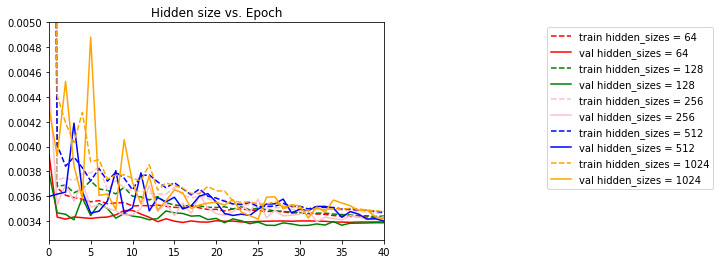

In [0]:
h_train_loss=[[0.022608473164983458, 0.0036686246454662725, 0.0036084712208513687, 0.0035903740935481904, 0.003576892925751948, 0.003556269664332513, 0.0035650780533319263, 0.003539761939706902, 0.0035466995124318976, 0.003549984719119663, 0.0035219785484780627, 0.003525915368539622, 0.0035239274817995907, 0.0035291174034837907, 0.003519671725684671, 0.0035111655972375555, 0.0035087602205453364, 0.0035220247786113524, 0.003506854677580418, 0.0034941880114762705, 0.0034948174262464772, 0.0034824194871192057, 0.00349796645975543, 0.003498090415288187, 0.0034908001515560035, 0.0034854753456850787, 0.0034772688367714485, 0.003480488856368494, 0.003474827972240746, 0.0034654452944386416, 0.0034676827923811183, 0.0034598671387298017, 0.0034577565436153027, 0.0034543237672565973, 0.0034450037887592505, 0.0034412856262964688, 0.003438638032951612, 0.0034369282408359997, 0.0034336578770071207, 0.0034311757595240464, 0.0034288512170882668, 0.0034250375288500776, 0.00342070753269685, 0.0034190673536310594, 0.003416654953687656, 0.0034198133858882374, 0.0034144071163609625, 0.0034110947621880266, 0.0034101888977513626, 0.0034095471924572153], [0.01887343593047765, 0.0036808346784332905, 0.0036903018332502947, 0.003628452321442556, 0.003658774658484854, 0.0037247765669220587, 0.003659332467894244, 0.003647565215114292, 0.00361954566901474, 0.003672073916456382, 0.0036007214949004412, 0.0035949702520392895, 0.0035705906054103458, 0.0035984395408806035, 0.003548288924195539, 0.003530602903120462, 0.0035228823866256006, 0.003525867523072757, 0.0035229800678827474, 0.003512032812355253, 0.0035101042687514326, 0.003515921503672664, 0.0034982061301305043, 0.00351702494213615, 0.0034907648508338547, 0.0035058237616033333, 0.0034924944038351438, 0.003483023279918191, 0.0034787631883263226, 0.0034727059032131987, 0.0034698426408307035, 0.0034633605589529846, 0.003465285770617789, 0.0034648282031293927, 0.0034569352989206165, 0.003453207271158453, 0.0034498165656880633, 0.0034448580507840205, 0.0034432480279242665, 0.003438114333231517, 0.0034409169635803596, 0.0034452289406293472, 0.0034408453244307055, 0.0034344294051662453, 0.003432188506003439, 0.0034305849454244522, 0.003428053317924704, 0.0034267239650234396, 0.003424786226880714, 0.003422733413138828], [0.018437501102140763, 0.0037332141075313574, 0.0037495556845882436, 0.0037260660136921135, 0.003780401916606579, 0.003789990454177728, 0.0038339848028177896, 0.003649801350902857, 0.003727106609177299, 0.0036675498052310897, 0.0036427685689953406, 0.003643447174349936, 0.00362410396564661, 0.0036195586397638167, 0.003617274681034278, 0.00366982997289094, 0.0036131905870724138, 0.0035853759580617393, 0.0036044133049095185, 0.003584100792328335, 0.0035469136113770367, 0.0035708864423923377, 0.0035263173742128943, 0.0035312405305657144, 0.003533236845017873, 0.00353889619558671, 0.0035075174897295854, 0.003508106059947513, 0.0035092003196780758, 0.0034969337983056905, 0.003484013914300992, 0.0034956238421846213, 0.0034966892986823387, 0.0034905844260143433, 0.0034969189319744463, 0.0034858848678129837, 0.0034865409239929744, 0.0034791574352496584, 0.0034743739149109194, 0.00346234135227505, 0.003466079107341849, 0.003466321632163826, 0.003466928881267464, 0.003474938866447627, 0.003458444713955609, 0.003460142233719428, 0.003449796293332143, 0.003450831439349861, 0.003452760169407489, 0.0034462661474822013], [0.011774507083180475, 0.004013514138258448, 0.0038424389232404347, 0.003916684501781696, 0.003830386748408702, 0.0037247414115770924, 0.0038238382671119237, 0.0037221734281402174, 0.003794251933383445, 0.0037458082025007503, 0.0036519348600546155, 0.0037660503799731774, 0.0037728089558119638, 0.0037160689967146855, 0.0036691502022473672, 0.003709532538565194, 0.0036606429604722594, 0.003611469477021355, 0.0036588988783655733, 0.003600837023383597, 0.00358549745041665, 0.003560424601560746, 0.003539271687055234, 0.003535000598379903, 0.0035507725141904643, 0.0035161176374621265, 0.003519817078258933, 0.0035207051201723515, 0.003543027040616768, 0.0035171176545412803, 0.0035200798970162566, 0.003498503335229144, 0.003516016046827038, 0.003509992685801221, 0.003509923441210625, 0.003498074279840642, 0.003496541118256869, 0.0034881388001916248, 0.003488736347261271, 0.003478957938193154, 0.003470387086991554, 0.0034767392191778473, 0.0034780998429381933, 0.003468881191958378, 0.0034630804034934295, 0.003465415888496228, 0.003460709903033344, 0.003456716186544911, 0.003453094977033665, 0.0034492667248601293], [0.009135474851430674, 0.0044119108581870065, 0.0041908465674131866, 0.004032977315317082, 0.004274622558017935, 0.003878340317595114, 0.0038948298530365392, 0.0037391582204831567, 0.003770871367116224, 0.0037721661706947214, 0.0037458381265386698, 0.0037238587498498277, 0.003854422156161409, 0.0036503242192471898, 0.003708214559156932, 0.0036856803359706105, 0.003665039508898811, 0.0036224524222685374, 0.003622650061222929, 0.003680043323230513, 0.003643835775035517, 0.0036424771655441785, 0.0035613315387220098, 0.003552355163170373, 0.003555704458953616, 0.0035380631955946244, 0.003537932740395692, 0.0035554254493804847, 0.0035172150014119784, 0.0035266044834530268, 0.003501901226648228, 0.0034874022641120765, 0.0035025915621242267, 0.003491157548770884, 0.0035007680642297418, 0.0034984547685551633, 0.00350179858780201, 0.0034994808222523063, 0.0034882921272154322, 0.0034827273436519126, 0.0034802369910625483, 0.0034741593817271656, 0.0034694154751562793, 0.003466166297023041, 0.003471771632964776, 0.0034620864396324243, 0.0034535594650816808, 0.0034548342250650976, 0.00345370719972165, 0.003455002776468248]]
h_val_loss=[[0.00394656290026272, 0.0034330921138034146, 0.0034162886440753937, 0.003434069235535229, 0.0034278815283494838, 0.0034222070346860323, 0.003429294947315665, 0.003433230387813905, 0.0034509599208831787, 0.003485162906786975, 0.0034864619374275208, 0.003457339370951933, 0.0034310909755089704, 0.0033957217546070322, 0.003419141339905122, 0.003400256090304431, 0.0033893644371453453, 0.0034018277245409347, 0.0033937017707263723, 0.0033921737442998323, 0.0034032444305279676, 0.0033993376966784984, 0.003400483771282084, 0.0033937048386125, 0.0033945605597075295, 0.003398299217224121, 0.003399408038924722, 0.003400864189161974, 0.0034013809088398426, 0.003399299128967173, 0.0034018844804343056, 0.0034018803168745604, 0.003400519928511451, 0.003399039016050451, 0.0033931407858343687, 0.003392730127362644, 0.003390710143481984, 0.003393122597652323, 0.0033931981991319094, 0.003393824267036775, 0.0033944895600571353, 0.003392458181170856, 0.003390242071712718, 0.0033915647689033955, 0.003393699360244414, 0.0034050016718752242, 0.0034025302704642803, 0.0034015516147894017, 0.0034030566320699803, 0.003404528998276767], [0.0037945592228104084, 0.00346700255485142, 0.0034554800128235538, 0.0034110039910849404, 0.003588433432228425, 0.0034446304335313685, 0.0035422429004136253, 0.0035022313103956334, 0.0034241921761456657, 0.0034609436988830566, 0.0034410236951182872, 0.003431593451429816, 0.0034112680484266844, 0.0034209860160070308, 0.003482412108603646, 0.0034671217641409706, 0.003461920820614871, 0.0034407570081598617, 0.0034438904155703154, 0.0034128162352477804, 0.0034222394666251015, 0.0033872907652574427, 0.0034182255758958705, 0.0034027533496127408, 0.0033797547221183777, 0.0033924708909848157, 0.0033673611195648417, 0.003365480286233565, 0.003386264995617025, 0.003377528094193515, 0.003365018788506003, 0.0033660704160437863, 0.0033776983618736267, 0.003368558909963159, 0.0033966443117927105, 0.0033674509648014515, 0.0033833038280991945, 0.0033842092927764446, 0.003385361284017563, 0.003387261401204502, 0.003386909032569212, 0.003390906488194185, 0.003385748275939156, 0.003384184092283249, 0.0033852832720560186, 0.0033810254843796, 0.0033833489698522233, 0.003385938484879101, 0.0033873096108436584, 0.003388408133212258], [0.004542739075772902, 0.0035328702891574185, 0.003696140121011173, 0.0035609598545467153, 0.0037105328896466423, 0.003514018128899967, 0.0035311112947323743, 0.0035055604051141176, 0.003483557964072508, 0.003449349938070073, 0.0034520832054755267, 0.003502846202429603, 0.0036859858561964598, 0.0034777158323456257, 0.0035415859345127552, 0.003445311504251817, 0.003546309164341758, 0.0034613092156017527, 0.003612435039351968, 0.003507066079798867, 0.003459989148027757, 0.0034468653885757223, 0.0034757821875460006, 0.0035338710774393644, 0.0034723053960239187, 0.0035763231708722957, 0.003426154308459338, 0.003486061797422521, 0.003442977281177745, 0.0034475113977404204, 0.0034565493902739357, 0.003491575446198968, 0.0033957966986824482, 0.0034327824764391955, 0.0034209310131914474, 0.0034104414722498726, 0.00344414307790644, 0.0034334869945750516, 0.0034128059359157786, 0.0034172335530028622, 0.003434421823305242, 0.003412019242258633, 0.0033929251572665047, 0.003396475358920939, 0.0034015807597076193, 0.003417413681745529, 0.003429479677887524, 0.0034285253461669475, 0.003409175750087289, 0.0034337808542391833], [0.0035983611117391024, 0.0036179083673393026, 0.0036338451592361227, 0.0041888584108913645, 0.003640246303642497, 0.003464986296261058, 0.00348058803116574, 0.0035615826354307286, 0.0038063508622786578, 0.003467434469391318, 0.0035075882778448217, 0.0037892495884614833, 0.003482316565864226, 0.0035905090763288386, 0.003555016263442881, 0.003592517226934433, 0.003497865708435283, 0.003522156354259042, 0.003601688672514523, 0.0036220053101287167, 0.003554021172663745, 0.003460891983088325, 0.0034462984870461855, 0.003456266925615423, 0.003446346039281172, 0.003496217596180299, 0.0035377707989776835, 0.003539348788121167, 0.003577825120266746, 0.0034668719505562503, 0.003496467190630296, 0.0034850908114629634, 0.003518464372438543, 0.0035189567681621105, 0.003505366470883874, 0.0034307594246724073, 0.00347670803175253, 0.00345711870228543, 0.0034168949898551494, 0.0034193804158883937, 0.003402493674965466, 0.0034016423365649056, 0.003403582993675681, 0.0034133610041702494, 0.0034075521809213303, 0.003407544292071286, 0.0034298828857786514, 0.0034356831627733566, 0.0034404302782872144, 0.003443484358927783], [0.00431311919408686, 0.003924014813759748, 0.004525546641910777, 0.0038470042979016025, 0.0035796424045282252, 0.00488116592168808, 0.003607409622739343, 0.003618537283995572, 0.0034949650221011218, 0.0040551814086296975, 0.003711206071517047, 0.0035408660769462585, 0.0037661799613167256, 0.003488498794681886, 0.0035645565127625186, 0.0036513204960262075, 0.003627806025392869, 0.0035015739062253166, 0.0035302614902748782, 0.00354589061701999, 0.0035521118518184215, 0.003529266837765189, 0.003573587054715437, 0.0034725530182614047, 0.0034447544637848347, 0.003417176139705321, 0.003592899836161557, 0.003596376408548916, 0.0034996314960367538, 0.0035322586841443006, 0.0035230302635361165, 0.0034254410249345444, 0.00351374815492069, 0.0034722324241610136, 0.0035697370767593384, 0.0035465169040595785, 0.0035246735548271854, 0.003485996276140213, 0.0034904107451438904, 0.0034350524930392996, 0.003418852739474353, 0.0034118353882256675, 0.003410171498270596, 0.003425977466737523, 0.00341247022151947, 0.003415498005993226, 0.0034127873094642863, 0.003407879129928701, 0.003456892555250841, 0.003424693118123447]]

c = ['r','g','pink','b','orange','purple']
for i in range(5):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train hidden_sizes = {}'.format(hidden_sizes[i]))
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i],label = 'val hidden_sizes = {}'.format(hidden_sizes[i]))
  plt.xlim((0,40))
  plt.ylim((0.00325,0.005))
  plt.title('Hidden size vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1.5, 1, 0.5, 0))
  

plt.show()

In [0]:
print(h_train_loss)
print(h_val_loss)

[[0.022608473164983458, 0.0036686246454662725, 0.0036084712208513687, 0.0035903740935481904, 0.003576892925751948, 0.003556269664332513, 0.0035650780533319263, 0.003539761939706902, 0.0035466995124318976, 0.003549984719119663, 0.0035219785484780627, 0.003525915368539622, 0.0035239274817995907, 0.0035291174034837907, 0.003519671725684671, 0.0035111655972375555, 0.0035087602205453364, 0.0035220247786113524, 0.003506854677580418, 0.0034941880114762705, 0.0034948174262464772, 0.0034824194871192057, 0.00349796645975543, 0.003498090415288187, 0.0034908001515560035, 0.0034854753456850787, 0.0034772688367714485, 0.003480488856368494, 0.003474827972240746, 0.0034654452944386416, 0.0034676827923811183, 0.0034598671387298017, 0.0034577565436153027, 0.0034543237672565973, 0.0034450037887592505, 0.0034412856262964688, 0.003438638032951612, 0.0034369282408359997, 0.0034336578770071207, 0.0034311757595240464, 0.0034288512170882668, 0.0034250375288500776, 0.00342070753269685, 0.0034190673536310594, 0.

In [0]:
# hyperparameter tuning: dropout
dropout=[0.1,0.2,0.3]
d_train_loss=[]
d_val_loss=[]
for d in dropout:
  model = LSTM(hidden_layer_size=512, dropout=d,num_layer=2).to(current_device)
  loss_function = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train+1):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()
      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))

      y_pred = model(seq)
      loss = loss_function(y_pred, labels)
      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    train_loss_hist.append(train_loss_cache/(num_batches_train+1))

    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val+1):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        y_pred = model(seq)
        val_loss = loss_function(y_pred, labels)
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val+1))
    print('d: ',d,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  d_train_loss.append(train_loss_hist)
  d_val_loss.append(val_loss_hist)

In [0]:
# hyperparameter tuning: num_layer
numlayer=[1,2,3]
l_train_loss=[]
l_val_loss=[]
for l in numlayer:
  model = LSTM(hidden_layer_size=512, dropout=0.1,num_layer=l).to(current_device)
  loss_function = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train+1):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()
      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))

      y_pred = model(seq)
      loss = loss_function(y_pred, labels)
      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    train_loss_hist.append(train_loss_cache/(num_batches_train+1))

    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val+1):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        y_pred = model(seq)
        val_loss = loss_function(y_pred, labels)
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val+1))
    print('l: ',l,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  l_train_loss.append(train_loss_hist)
  l_val_loss.append(val_loss_hist)

## test set

In [0]:
model.eval()
test_loss_cache=0
for s in range(num_batches_test+1):
    seq = torch.FloatTensor(test_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(test_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      y_pred = model(seq)
      test_loss = loss_function(y_pred, labels)
    test_loss_cache+=test_loss

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [0]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

In [0]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)

# LSTM - LARGER LAG

## hyperparameter tuning

In [0]:
# specify the number of lag hours
n_hours = 100
n_features = 8
# frame as supervised learning
train = series_to_supervised(train_data_normalized, n_hours, 1)
val = series_to_supervised(val_data_normalized, n_hours, 1)
test = series_to_supervised(test_data_normalized, n_hours, 1)

n_obs = n_hours * n_features
train_X, train_y = train.values[:, :n_obs], train.values[:, -n_features]
val_X, val_y = val.values[:, :n_obs], val.values[:, -n_features]
test_X, test_y=test.values[:, :n_obs], test.values[:, -n_features]


train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))


epochs = 50
L_train=len(train_X)
L_val=len(val_X)
L_test=len(test_X)
bsize=64
num_batches_train = L_train//bsize
num_batches_test = L_test//bsize
num_batches_val = L_val//bsize

In [0]:
# hyperparameter tuning: hidden size
hidden_sizes=[64,128,256,512,1024]
h_train_loss=[]
h_val_loss=[]
for hidden in hidden_sizes:
  model = LSTM(input_size=n_hours*n_features,hidden_layer_size=hidden,num_layer=2).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('h: ',hidden,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  h_train_loss.append(train_loss_hist)
  h_val_loss.append(val_loss_hist)

h:  64 epoch:  0  valid loss:  0.016871109715214484 train loss:  0.03210658673689995
h:  64 epoch:  1  valid loss:  0.011547703213161892 train loss:  0.01509113779408305
h:  64 epoch:  2  valid loss:  0.010639877672548648 train loss:  0.01125849012083735
h:  64 epoch:  3  valid loss:  0.008774820080509893 train loss:  0.008941563204460223
h:  64 epoch:  4  valid loss:  0.011647990014817979 train loss:  0.007298112412913117
h:  64 epoch:  5  valid loss:  0.008664593873200593 train loss:  0.006508402537375519
h:  64 epoch:  6  valid loss:  0.01712538577892162 train loss:  0.006384303719935338
h:  64 epoch:  7  valid loss:  0.009200328367727774 train loss:  0.006061388484159855
h:  64 epoch:  8  valid loss:  0.00827622237028899 train loss:  0.00573951707973148
h:  64 epoch:  9  valid loss:  0.00673039886686537 train loss:  0.0049498926238414715
h:  64 epoch:  10  valid loss:  0.007473124398125542 train loss:  0.005001841922380115
h:  64 epoch:  11  valid loss:  0.008649357159932454 train 

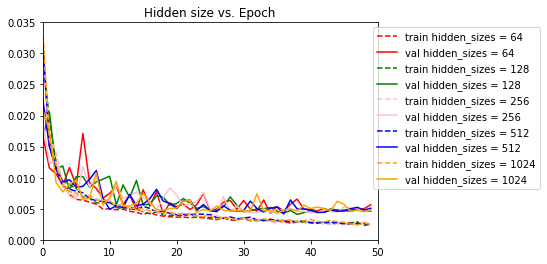

In [0]:
c = ['r','g','pink','b','orange','purple']
for i in range(5):
  plt.plot(range(epochs),h_train_loss[i],'--',c = c[i],label = 'train hidden_sizes = {}'.format(hidden_sizes[i]))
  plt.plot(range(epochs),h_val_loss[i],'-',c=c[i],label = 'val hidden_sizes = {}'.format(hidden_sizes[i]))
  plt.xlim((0,50))
  plt.ylim((0,0.035))
  plt.title('Hidden size vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  

plt.show()

In [0]:
print(h_train_loss)
print(h_val_loss)

[[0.03210658673689995, 0.01509113779408305, 0.01125849012083735, 0.008941563204460223, 0.007298112412913117, 0.006508402537375519, 0.006384303719935338, 0.006061388484159855, 0.00573951707973148, 0.0049498926238414715, 0.005001841922380115, 0.0048311918077866035, 0.004926429313860821, 0.004582936684403824, 0.004411401964097621, 0.004111209225799913, 0.004397989566974851, 0.003981398330570626, 0.003815399885559849, 0.0037006747132282496, 0.0036547145355380587, 0.0036507735266054432, 0.0035540507483509966, 0.0036417592688674466, 0.003540613576568851, 0.003383228479765495, 0.0032445220925150504, 0.003527377305968728, 0.003165478216323407, 0.003165509638221819, 0.003429022246493172, 0.003075070406066812, 0.003214937549824629, 0.003090630446034347, 0.003342552922142014, 0.003057543176009414, 0.0029422888441841006, 0.0026803326133960186, 0.002849766396722492, 0.002900773512502125, 0.0027383580205299217, 0.002645780908016652, 0.002835754082342519, 0.0028185381114950057, 0.002643907227491238, 

In [0]:
# hyperparameter tuning: dropout
dropout=[0.1,0.2,0.3]
d_train_loss=[]
d_val_loss=[]
for d in dropout:
  model = LSTM(input_size=n_hours*n_features,hidden_layer_size=512,num_layer=2,dropout=d).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      #torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('d: ',d,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  d_train_loss.append(train_loss_hist)
  d_val_loss.append(val_loss_hist)

d:  0.1 epoch:  0  valid loss:  0.02031014053909867 train loss:  0.02840601625368424
d:  0.1 epoch:  1  valid loss:  0.016941416705096208 train loss:  0.01650073552308513
d:  0.1 epoch:  2  valid loss:  0.011949145352398908 train loss:  0.012057728225673194
d:  0.1 epoch:  3  valid loss:  0.010008394276654278 train loss:  0.009741711748213316
d:  0.1 epoch:  4  valid loss:  0.008405346340603298 train loss:  0.008299042027464882
d:  0.1 epoch:  5  valid loss:  0.007641672205041956 train loss:  0.007602401257868771
d:  0.1 epoch:  6  valid loss:  0.006941405932108561 train loss:  0.007031381926165608
d:  0.1 epoch:  7  valid loss:  0.006729941897922092 train loss:  0.006473427930018631
d:  0.1 epoch:  8  valid loss:  0.008507793921011466 train loss:  0.006111907056026185
d:  0.1 epoch:  9  valid loss:  0.008288688129848905 train loss:  0.006128507475361094
d:  0.1 epoch:  10  valid loss:  0.008829591892383717 train loss:  0.005987527096152597
d:  0.1 epoch:  11  valid loss:  0.0063615158

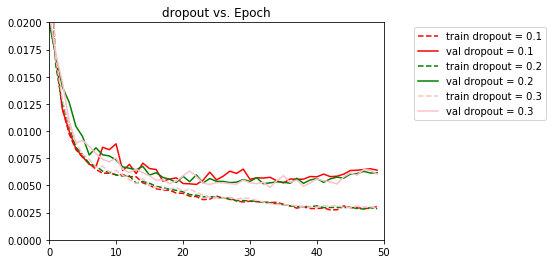

In [0]:
c = ['r','g','pink','b','orange','purple']
for i in range(3):
  plt.plot(range(epochs),d_train_loss[i],'--',c = c[i],label = 'train dropout = {}'.format(dropout[i]))
  plt.plot(range(epochs),d_val_loss[i],'-',c=c[i],label = 'val dropout = {}'.format(dropout[i]))
  plt.xlim((0,50))
  plt.ylim((0,0.020))
  plt.title('dropout vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  

plt.show()

In [0]:
print(d_train_loss)
print(d_val_loss)

[[0.02840601625368424, 0.01650073552308513, 0.012057728225673194, 0.009741711748213316, 0.008299042027464882, 0.007602401257868771, 0.007031381926165608, 0.006473427930018631, 0.006111907056026185, 0.006128507475361094, 0.005987527096152597, 0.005999653620064465, 0.005805271614345961, 0.005798799605207391, 0.0052364076466295045, 0.005020111722641106, 0.004697497116541338, 0.004587585399426362, 0.004554905290472706, 0.0042978180375205, 0.0042746069390593696, 0.004008701014452301, 0.003973029835448458, 0.003691932281095486, 0.003740472161834483, 0.00402505261423855, 0.003815688059744137, 0.003834993499808972, 0.0035627546158227886, 0.0034778317527015806, 0.003548172023071504, 0.003501918899306439, 0.0034857529834753163, 0.0034235201962595557, 0.003449518576147587, 0.0032639282191299656, 0.003124338939785199, 0.0029122982347074664, 0.0030298725622615106, 0.0028756983684950755, 0.002875192723758761, 0.0029321246388359207, 0.0027502824464950906, 0.002762285378952708, 0.0031162828423351306, 

In [0]:
# hyperparameter tuning: num_layer
num_layers=[1,2,3]
l_train_loss=[]
l_val_loss=[]
for l in num_layers:
  model = LSTM(input_size=n_hours*n_features,hidden_layer_size=512,num_layer=l,dropout=0.3).to(current_device)
  loss_function = nn.MSELoss(reduction='sum')
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  train_loss_hist=[]
  val_loss_hist=[]
  for i in range(epochs):
    model.train()
    train_loss_cache=0
    for s in range(num_batches_train):
      seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

      optimizer.zero_grad()
      # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
      #                 torch.zeros(1, 1, model.hidden_layer_size))
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      loss = loss_function(y_pred.view(-1), labels.view(-1))

      train_loss_cache += loss.item()
      loss.backward()
      #torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()

    # print(y_pred)
    # print(labels)
    train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
    model.eval()
    val_loss_cache=0
    for s in range(num_batches_val):
      seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
      labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
      with torch.no_grad():
        #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
        y_pred = model(seq)
        val_loss = loss_function(y_pred.view(-1), labels.view(-1))
      val_loss_cache+=val_loss
    val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
    print('l: ',l,'epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])
  l_train_loss.append(train_loss_hist)
  l_val_loss.append(val_loss_hist)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


l:  1 epoch:  0  valid loss:  0.020653274324205186 train loss:  0.030332154477567257
l:  1 epoch:  1  valid loss:  0.016915457336990923 train loss:  0.01602216878699606
l:  1 epoch:  2  valid loss:  0.016001289862173574 train loss:  0.01119089975356995
l:  1 epoch:  3  valid loss:  0.012432441888032136 train loss:  0.0094805243773938
l:  1 epoch:  4  valid loss:  0.010684721558182328 train loss:  0.008086033714540813
l:  1 epoch:  5  valid loss:  0.009577342315956399 train loss:  0.0071238999102182735
l:  1 epoch:  6  valid loss:  0.009029510286119249 train loss:  0.006627708445576168
l:  1 epoch:  7  valid loss:  0.009747241161487721 train loss:  0.006167409249698191
l:  1 epoch:  8  valid loss:  0.00809302153410735 train loss:  0.006294402035244465
l:  1 epoch:  9  valid loss:  0.007181864756124991 train loss:  0.005391398586024885
l:  1 epoch:  10  valid loss:  0.00979240205552843 train loss:  0.005148559526414444
l:  1 epoch:  11  valid loss:  0.007710045355337637 train loss:  0.00

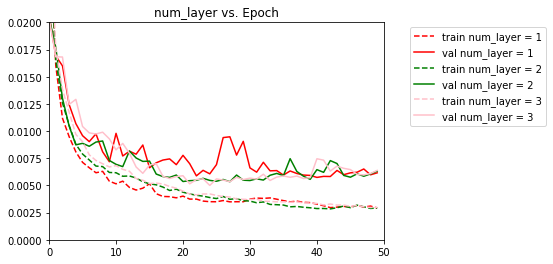

In [0]:
c = ['r','g','pink','b','orange','purple']
for i in range(3):
  plt.plot(range(epochs),l_train_loss[i],'--',c = c[i],label = 'train num_layer = {}'.format(num_layers[i]))
  plt.plot(range(epochs),l_val_loss[i],'-',c=c[i],label = 'val num_layer = {}'.format(num_layers[i]))
  plt.xlim((0,50))
  plt.ylim((0,0.020))
  plt.title('num_layer vs. Epoch')
  plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  

plt.show()

In [0]:
print(l_train_loss)
print(l_val_loss)

[[0.030332154477567257, 0.01602216878699606, 0.01119089975356995, 0.0094805243773938, 0.008086033714540813, 0.0071238999102182735, 0.006627708445576168, 0.006167409249698191, 0.006294402035244465, 0.005391398586024885, 0.005148559526414444, 0.005394304363081286, 0.004819064471432302, 0.0045761205881670215, 0.004747035039011662, 0.005154459574752781, 0.0042401935411495815, 0.003987633241894154, 0.003966909340478128, 0.003862153966638111, 0.004019437230465909, 0.0037443093292480363, 0.0037439745796445443, 0.0035621944937402994, 0.0035038941541909625, 0.0034990862673808325, 0.0036103011369447344, 0.0034911137292084225, 0.003502154026593079, 0.0034994896778500115, 0.0037473878373485967, 0.003838327296377017, 0.003808193705943398, 0.003851816220362959, 0.0037350864467212584, 0.003603857991601119, 0.0034929706041203624, 0.0035564248037337955, 0.0034478155037931226, 0.0034196033240720654, 0.0032817279442754975, 0.0031313557783179654, 0.0029615684618516627, 0.003004062489654978, 0.003073307243

## change lag size

### lag=2

In [0]:
import copy

In [0]:
# specify the number of lag hours
n_hours = 2
n_features = 8
# frame as supervised learning
train = series_to_supervised(train_data_normalized, n_hours, 1)
val = series_to_supervised(val_data_normalized, n_hours, 1)
test = series_to_supervised(test_data_normalized, n_hours, 1)

n_obs = n_hours * n_features
train_X, train_y = train.values[:, :n_obs], train.values[:, -n_features]
val_X, val_y = val.values[:, :n_obs], val.values[:, -n_features]
test_X, test_y=test.values[:, :n_obs], test.values[:, -n_features]


train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))


epochs = 50
L_train=len(train_X)
L_val=len(val_X)
L_test=len(test_X)
bsize=64
num_batches_train = L_train//bsize
num_batches_test = L_test//bsize
num_batches_val = L_val//bsize

In [0]:
model = LSTM(input_size=n_hours*n_features,hidden_layer_size=512,num_layer=3,dropout=0.3).to(current_device)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_loss_hist=[]
val_loss_hist=[]
best_model=None
lowest_score=float('inf')
for i in range(epochs):
  model.train()
  train_loss_cache=0
  for s in range(num_batches_train):
    seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

    optimizer.zero_grad()
    # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
    #                 torch.zeros(1, 1, model.hidden_layer_size))
    #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
    y_pred = model(seq)
    loss = loss_function(y_pred.view(-1), labels.view(-1))

    train_loss_cache += loss.item()
    loss.backward()
    #torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()

  # print(y_pred)
  # print(labels)
  train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
  model.eval()
  val_loss_cache=0
  for s in range(num_batches_val):
    seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      val_loss = loss_function(y_pred.view(-1), labels.view(-1))
    val_loss_cache+=val_loss
  epoch_loss=val_loss_cache.item()/(num_batches_val*len(seq))
  if epoch_loss<lowest_score:
    lowest_score=epoch_loss
    best_model = copy.deepcopy(model.state_dict())
  val_loss_hist.append(epoch_loss)
  print('epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])

epoch:  0  valid loss:  0.005083575406495263 train loss:  0.01582361807539393
epoch:  1  valid loss:  0.003762590096277349 train loss:  0.00488999276649116
epoch:  2  valid loss:  0.003677443546407363 train loss:  0.004341125975900549
epoch:  3  valid loss:  0.003485074814628152 train loss:  0.003993241269353444
epoch:  4  valid loss:  0.003313572091214797 train loss:  0.003930231044826106
epoch:  5  valid loss:  0.003263155327123754 train loss:  0.0038450691767597223
epoch:  6  valid loss:  0.003346511108033797 train loss:  0.0038763755233958363
epoch:  7  valid loss:  0.003254663637455772 train loss:  0.004037109627464135
epoch:  8  valid loss:  0.0034788283793365255 train loss:  0.003695715696179891
epoch:  9  valid loss:  0.003259129383984734 train loss:  0.0037927853214228904
epoch:  10  valid loss:  0.003473600043969996 train loss:  0.003768880688774634
epoch:  11  valid loss:  0.0033084570485002853 train loss:  0.0037406451246754183
epoch:  12  valid loss:  0.003240694017971263 

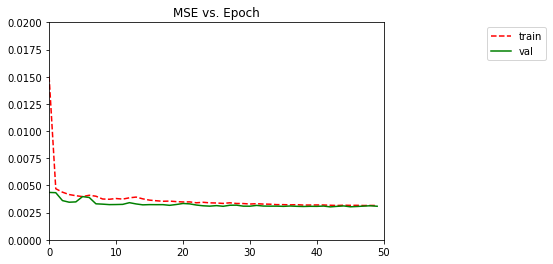

In [0]:
c = ['r','g','pink','b','orange','purple']

plt.plot(range(epochs),train_loss_hist,'--',c = c[0],label = 'train')
plt.plot(range(epochs),val_loss_hist,'-',c=c[1],label = 'val')
plt.xlim((0,50))
plt.ylim((0,0.020))
plt.title('MSE vs. Epoch')
plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  

plt.show()

In [0]:
print(train_loss_hist)
print(val_loss_hist)

[0.015040508382840127, 0.004695653286194656, 0.0043793748208601786, 0.004161437153740506, 0.004055869970016363, 0.00397443554943382, 0.004096627266078097, 0.004008068769746195, 0.003751470080796417, 0.0037281061130825703, 0.003797703541671418, 0.0037435380526159596, 0.0038632209130706704, 0.003928697119444245, 0.003765246782421581, 0.0036485270019696375, 0.003592174602445306, 0.003542955789518187, 0.0035612617165031958, 0.0035118938787136135, 0.003480805812698857, 0.003488088285028026, 0.0034040384867220995, 0.0034500821692323904, 0.0033984553638648817, 0.0033849897798211353, 0.0033462803655614454, 0.003405064851901214, 0.003339970545517659, 0.003334991764220432, 0.0032905997084718714, 0.0033213617659658494, 0.0032862957724089908, 0.0032743298357761487, 0.0032340675537527457, 0.0032333093339471314, 0.003215265393870451, 0.003230583361100133, 0.0031934541769371165, 0.0031998240080381916, 0.003205599286972083, 0.0032015860326800164, 0.003177644538303186, 0.0031575623799372857, 0.00317944

In [0]:
model.load_state_dict(best_model)
model.eval()
test_loss_cache=0
loss_function=nn.MSELoss(reduction='sum')
for s in range(num_batches_test):
    seq = torch.FloatTensor(test_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(test_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      y_pred = model(seq)
      test_loss = loss_function(y_pred, labels)
    test_loss_cache+=test_loss
epoch_loss=val_loss_cache.item()/(num_batches_val*len(seq))
print(epoch_loss)

0.003099719391149633


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### lag=3

In [0]:
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
train = series_to_supervised(train_data_normalized, n_hours, 1)
val = series_to_supervised(val_data_normalized, n_hours, 1)
test = series_to_supervised(test_data_normalized, n_hours, 1)

n_obs = n_hours * n_features
train_X, train_y = train.values[:, :n_obs], train.values[:, -n_features]
val_X, val_y = val.values[:, :n_obs], val.values[:, -n_features]
test_X, test_y=test.values[:, :n_obs], test.values[:, -n_features]


train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))


epochs = 50
L_train=len(train_X)
L_val=len(val_X)
L_test=len(test_X)
bsize=64
num_batches_train = L_train//bsize
num_batches_test = L_test//bsize
num_batches_val = L_val//bsize

In [0]:
model = LSTM(input_size=n_hours*n_features,hidden_layer_size=512,num_layer=3,dropout=0.3).to(current_device)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_loss_hist=[]
val_loss_hist=[]
best_model=None
lowest_score=float('inf')
for i in range(epochs):
  model.train()
  train_loss_cache=0
  for s in range(num_batches_train):
    seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

    optimizer.zero_grad()
    # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
    #                 torch.zeros(1, 1, model.hidden_layer_size))
    #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
    y_pred = model(seq)
    loss = loss_function(y_pred.view(-1), labels.view(-1))

    train_loss_cache += loss.item()
    loss.backward()
    #torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()

  # print(y_pred)
  # print(labels)
  train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
  model.eval()
  val_loss_cache=0
  for s in range(num_batches_val):
    seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      val_loss = loss_function(y_pred.view(-1), labels.view(-1))
    val_loss_cache+=val_loss
  epoch_loss=val_loss_cache.item()/(num_batches_val*len(seq))
  if epoch_loss<lowest_score:
    lowest_score=epoch_loss
    best_model = copy.deepcopy(model.state_dict())
  val_loss_hist.append(val_loss_cache.item()/(num_batches_val*len(seq)))
  print('epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])

epoch:  0  valid loss:  0.004721430294653948 train loss:  0.016406412321195853
epoch:  1  valid loss:  0.0033811760299346026 train loss:  0.004831954205931141
epoch:  2  valid loss:  0.0031707852202303268 train loss:  0.004209241301495188
epoch:  3  valid loss:  0.00323309880845687 train loss:  0.004071805562740722
epoch:  4  valid loss:  0.003527046783882029 train loss:  0.004029698983569274
epoch:  5  valid loss:  0.0032188340144998885 train loss:  0.0038851650562364516
epoch:  6  valid loss:  0.0033542377983822543 train loss:  0.004548856525916636
epoch:  7  valid loss:  0.003178114619325189 train loss:  0.0037684530224196796
epoch:  8  valid loss:  0.003222907509873895 train loss:  0.0036409919152066597
epoch:  9  valid loss:  0.003199744750471676 train loss:  0.003631178423671461
epoch:  10  valid loss:  0.003279336235102485 train loss:  0.0036406746329133953
epoch:  11  valid loss:  0.0031217731097165275 train loss:  0.003535434661614822
epoch:  12  valid loss:  0.003224295728346

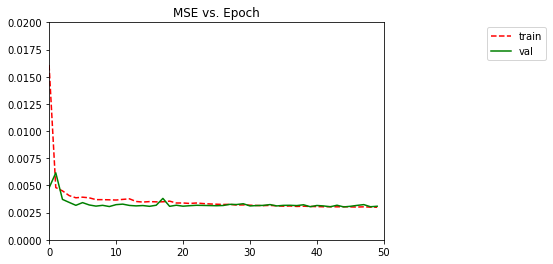

In [0]:
c = ['r','g','pink','b','orange','purple']

plt.plot(range(epochs),train_loss_hist,'--',c = c[0],label = 'train')
plt.plot(range(epochs),val_loss_hist,'-',c=c[1],label = 'val')
plt.xlim((0,50))
plt.ylim((0,0.020))
plt.title('MSE vs. Epoch')
plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  

plt.show()

In [0]:
print(train_loss_hist)
print(val_loss_hist)

[0.016080739911706225, 0.004804716839803368, 0.004501437968612323, 0.0040659313663704, 0.0038635170488519883, 0.003920714516851415, 0.00386143149618756, 0.003693486612320431, 0.003693484246723233, 0.003677858077406096, 0.0036578884374774325, 0.0037157546800780828, 0.003769425884063348, 0.0035247246117702104, 0.0034713956559591784, 0.003513847656994755, 0.0034904966886132593, 0.00349662819540325, 0.0035564233507294723, 0.003383879968707215, 0.003385522420237946, 0.003343262536095349, 0.0033843150104933637, 0.003333807087738097, 0.003298410845397994, 0.003272582372514213, 0.0032498621779334983, 0.0032604748127618576, 0.0031965865399612766, 0.003210860070189446, 0.0031821044902052217, 0.0031553522023046766, 0.0031428128020928765, 0.0031631575520642526, 0.0031265047850178146, 0.0030927233880658337, 0.0031130781096247273, 0.003068845533686349, 0.003090504132688227, 0.0030679250255272517, 0.003052198337447807, 0.003038275487175802, 0.003048784587895725, 0.003032549058003881, 0.00304467238095

In [0]:
model.load_state_dict(best_model)
model.eval()
test_loss_cache=0
loss_function=nn.MSELoss(reduction='sum')
for s in range(num_batches_test):
    seq = torch.FloatTensor(test_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(test_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      y_pred = model(seq)
      test_loss = loss_function(y_pred, labels)
    test_loss_cache+=test_loss
epoch_loss=val_loss_cache.item()/(num_batches_val*len(seq))
print(epoch_loss)

0.003177898552487878


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### lag=30

In [0]:
# specify the number of lag hours
n_hours = 30
n_features = 8
# frame as supervised learning
train = series_to_supervised(train_data_normalized, n_hours, 1)
val = series_to_supervised(val_data_normalized, n_hours, 1)
test = series_to_supervised(test_data_normalized, n_hours, 1)

n_obs = n_hours * n_features
train_X, train_y = train.values[:, :n_obs], train.values[:, -n_features]
val_X, val_y = val.values[:, :n_obs], val.values[:, -n_features]
test_X, test_y=test.values[:, :n_obs], test.values[:, -n_features]


train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))


epochs = 50
L_train=len(train_X)
L_val=len(val_X)
L_test=len(test_X)
bsize=64
num_batches_train = L_train//bsize
num_batches_test = L_test//bsize
num_batches_val = L_val//bsize

In [0]:
model = LSTM(input_size=n_hours*n_features,hidden_layer_size=512,num_layer=3,dropout=0.3).to(current_device)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_loss_hist=[]
val_loss_hist=[]
best_model=None
lowest_score=float('inf')
for i in range(epochs):
  model.train()
  train_loss_cache=0
  for s in range(num_batches_train):
    seq= torch.FloatTensor(train_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(train_y[s*bsize:(s+1)*bsize]).cuda()

    optimizer.zero_grad()
    # model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
    #                 torch.zeros(1, 1, model.hidden_layer_size))
    #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
    y_pred = model(seq)
    loss = loss_function(y_pred.view(-1), labels.view(-1))

    train_loss_cache += loss.item()
    loss.backward()
    #torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()

  # print(y_pred)
  # print(labels)
  train_loss_hist.append(train_loss_cache/(num_batches_train*len(seq)))
  model.eval()
  val_loss_cache=0
  for s in range(num_batches_val):
    seq = torch.FloatTensor(val_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(val_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      #h, c = torch.zeros([1, len(seq), hidden], dtype=torch.float64).to(current_device), torch.zeros([1,len(seq), hidden], dtype=torch.float64).to(current_device)
      y_pred = model(seq)
      val_loss = loss_function(y_pred.view(-1), labels.view(-1))
    val_loss_cache+=val_loss
  epoch_loss=val_loss_cache.item()/(num_batches_val*len(seq))
  if epoch_loss<lowest_score:
    lowest_score=epoch_loss
    best_model = copy.deepcopy(model.state_dict())
  val_loss_hist.append(epoch_loss)
  print('epoch: ',i,' valid loss: ',val_loss_hist[i],'train loss: ', train_loss_hist[i])

epoch:  0  valid loss:  0.008653769598287694 train loss:  0.022962702495401832
epoch:  1  valid loss:  0.006481898619848139 train loss:  0.007708662414234283
epoch:  2  valid loss:  0.005796535050167757 train loss:  0.006426408392286337
epoch:  3  valid loss:  0.005635191850802477 train loss:  0.0057889637024316
epoch:  4  valid loss:  0.0054965593359049625 train loss:  0.005554899536413935
epoch:  5  valid loss:  0.003979040419354159 train loss:  0.005102387071034409
epoch:  6  valid loss:  0.004379593712442061 train loss:  0.005281042891774114
epoch:  7  valid loss:  0.005465846727876102 train loss:  0.005038495893150992
epoch:  8  valid loss:  0.004785280893830692 train loss:  0.004643372154787061
epoch:  9  valid loss:  0.004121988135225633 train loss:  0.00454256079799488
epoch:  10  valid loss:  0.003943117225871366 train loss:  0.004383296754052181
epoch:  11  valid loss:  0.004915275117930244 train loss:  0.004556378551069798
epoch:  12  valid loss:  0.0044356860658701725 train

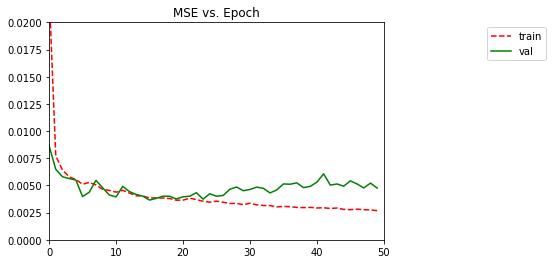

In [0]:
c = ['r','g','pink','b','orange','purple']

plt.plot(range(epochs),train_loss_hist,'--',c = c[0],label = 'train')
plt.plot(range(epochs),val_loss_hist,'-',c=c[1],label = 'val')
plt.xlim((0,50))
plt.ylim((0,0.020))
plt.title('MSE vs. Epoch')
plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.5, 0))
  

plt.show()

In [0]:
print(train_loss_hist)
print(val_loss_hist)

[0.022962702495401832, 0.007708662414234283, 0.006426408392286337, 0.0057889637024316, 0.005554899536413935, 0.005102387071034409, 0.005281042891774114, 0.005038495893150992, 0.004643372154787061, 0.00454256079799488, 0.004383296754052181, 0.004556378551069798, 0.004297795289052211, 0.0040473799656592, 0.0040343385994267775, 0.0038452643130686345, 0.003854502935712112, 0.0038473801403420002, 0.003796014061190067, 0.003640542386243559, 0.0036471779007706943, 0.003829375567384125, 0.003696210540611509, 0.0035511059832297326, 0.003461618432434412, 0.003559976595840076, 0.003453771427947634, 0.0033455167421919665, 0.0033429799147131965, 0.003236648906968776, 0.0033638234202924178, 0.0032174894111079537, 0.0031529897433039316, 0.0031490731384317444, 0.0030231715229196033, 0.003072226516584434, 0.003042148408570849, 0.0029771698812946557, 0.002961475038295233, 0.0029800901850079737, 0.0029262453364019047, 0.002947439368041914, 0.0028837381503393315, 0.002923299956544325, 0.002797973102405364

In [0]:
model.load_state_dict(best_model)
model.eval()
test_loss_cache=0
loss_function=nn.MSELoss(reduction='sum')
for s in range(num_batches_test):
    seq = torch.FloatTensor(test_X[s*bsize:(s+1)*bsize, :]).cuda()
    labels=torch.FloatTensor(test_y[s*bsize:(s+1)*bsize]).cuda()
    with torch.no_grad():
      y_pred = model(seq)
      test_loss = loss_function(y_pred, labels)
    test_loss_cache+=test_loss
epoch_loss=val_loss_cache.item()/(num_batches_val*len(seq))
print(epoch_loss)

0.004760705811135909


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [0]:
import numpy as np
np.sqrt(0.0031928139574387495)

0.0565049905533905